In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.pandas.set_option('display.max_columns', None)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df = pd.read_csv('../data/train.csv')
df.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


In [3]:
#Replace categorical columns with ones with their nulls filled

categorical_nans = [feature for feature in df.columns if df[feature].dtypes == 'O' and df[feature].isnull().sum() > 0]
categorical = [feature for feature in df.columns if df[feature].dtypes == 'O']
def replace_categorical_nans(df, categorical_nans):
    local_df = df.copy()
    local_df[categorical_nans]= local_df[categorical_nans].fillna('Missing')
    return local_df

df = replace_categorical_nans(df, categorical_nans)
df[categorical_nans].isnull().sum()

Alley             0
Mas Vnr Type      0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Fireplace Qu      0
Garage Type       0
Garage Finish     0
Garage Qual       0
Garage Cond       0
Pool QC           0
Fence             0
Misc Feature      0
dtype: int64

In [4]:
numerical_nans = [feature for feature in df.columns if df[feature].dtypes != 'O' and df[feature].isnull().sum() > 0]

numerical = [feature for feature in df.columns if df[feature].dtypes != 'O']

df[numerical_nans].isnull().sum()

Lot Frontage      330
Mas Vnr Area       22
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Yr Blt     114
Garage Cars         1
Garage Area         1
dtype: int64

In [5]:
#Replace numerical columns with ones with their nulls filled and create new column for each remembering where the nulls were

for feature in numerical_nans:

    median_val = df[feature].median()
    df[feature + '_nans'] = np.where(df[feature].isnull(), 1,0)
    df[feature].fillna(median_val, inplace = True)
    
df[numerical_nans].isnull().sum()

Lot Frontage      0
Mas Vnr Area      0
BsmtFin SF 1      0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    0
Bsmt Half Bath    0
Garage Yr Blt     0
Garage Cars       0
Garage Area       0
dtype: int64

In [6]:
#Now we can see that all nulls are at least gone
df.isnull().sum().sum()

0

In [7]:
#grab year features 
year_features = [feature for feature in df.columns if 'Yr' in feature or 'Year' in feature]
year_features

['Year Built',
 'Year Remod/Add',
 'Garage Yr Blt',
 'Yr Sold',
 'Garage Yr Blt_nans']

In [8]:
#Change relevant year features to a useful metric, how many years prior to year sold, instead of the year in general
for feature in ['Year Built','Year Remod/Add','Garage Yr Blt']:
    df[feature] = (df['Yr Sold']- df[feature])
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Lot Frontage_nans,Mas Vnr Area_nans,BsmtFin SF 1_nans,BsmtFin SF 2_nans,Bsmt Unf SF_nans,Total Bsmt SF_nans,Bsmt Full Bath_nans,Bsmt Half Bath_nans,Garage Yr Blt_nans,Garage Cars_nans,Garage Area_nans
0,109,533352170,60,RL,68.0,13517,Pave,Missing,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,34,5,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Missing,Attchd,34.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,Missing,Missing,Missing,0,3,2010,WD,130500,1,0,0,0,0,0,0,0,0,0,0
1,544,531379050,60,RL,43.0,11492,Pave,Missing,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,13,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,12.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,Missing,Missing,Missing,0,4,2009,WD,220000,0,0,0,0,0,0,0,0,0,0,0
2,153,535304180,20,RL,68.0,7922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,57,3,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Missing,Detchd,57.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,Missing,Missing,Missing,0,1,2010,WD,109000,0,0,0,0,0,0,0,0,0,0,0
3,318,916386060,60,RL,73.0,9802,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,4,3,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,Missing,BuiltIn,3.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,Missing,Missing,Missing,0,4,2010,WD,174000,0,0,0,0,0,0,0,0,0,0,0
4,255,906425045,50,RL,82.0,14235,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,110,17,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Missing,Detchd,53.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,Missing,Missing,Missing,0,3,2010,WD,138500,0,0,0,0,0,0,0,0,0,0,0


In [9]:
#Fixing values that were corrupted, this is what they should be when you subtract their original dates from their years sold 
df.loc[1885, ['Year Built','Year Remod/Add','Garage Yr Blt']] = 32
df.loc[1699, ['Year Built']] = 90
df.loc[1699, ['Year Remod/Add']] =17
df.loc[1699, ['Garage Yr Blt']] = 90
df.loc[1719, ['Year Built','Year Remod/Add','Garage Yr Blt']] =47

## Now to address any removable Outliers

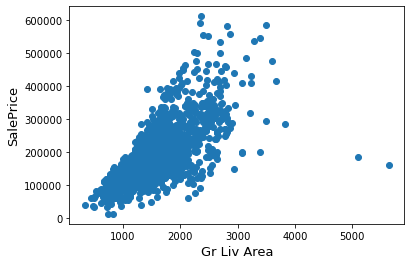

In [10]:
fig, ax = plt.subplots()
ax.scatter(x = df['Gr Liv Area'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('Gr Liv Area', fontsize=13)
plt.show()

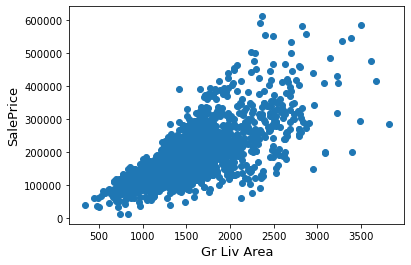

In [11]:
#There are two at the bottom right with extremely large GrLivArea that are of a low price
#These are wildly away from the others and seem logically/realistically like errors so I will remove
df = df.drop(df[(df['Gr Liv Area']>4000) & (df['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df['Gr Liv Area'], df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('Gr Liv Area', fontsize=13)
plt.show()

In [12]:
#Now to fix the non normally distributed continuous features found during EDA by transforming to logarithmic form
continuous_features = [feature for feature in numerical if len(df[feature].unique())>25 and feature not in year_features+['Id', 'PID']]

print(len(continuous_features))

columns_log_transformed = []
for feature in continuous_features:
        if 0 in df[feature].unique(): #Whenever doing log transformations this is necessary becuase Log of zero is undefined
            pass
        else:
            df[feature]=np.log(df[feature])
            columns_log_transformed.append(feature)
df.head()

18


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Lot Frontage_nans,Mas Vnr Area_nans,BsmtFin SF 1_nans,BsmtFin SF 2_nans,Bsmt Unf SF_nans,Total Bsmt SF_nans,Bsmt Full Bath_nans,Bsmt Half Bath_nans,Garage Yr Blt_nans,Garage Cars_nans,Garage Area_nans
0,109,533352170,60,RL,4.219508,9.511703,Pave,Missing,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,34,5,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,6.586172,754,0,7.299121,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Missing,Attchd,34.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,Missing,Missing,Missing,0,3,2010,WD,11.779129,1,0,0,0,0,0,0,0,0,0,0
1,544,531379050,60,RL,3.761200,9.349406,Pave,Missing,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,13,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,6.816736,1209,0,7.660114,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,12.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,Missing,Missing,Missing,0,4,2009,WD,12.301383,0,0,0,0,0,0,0,0,0,0,0
2,153,535304180,20,RL,4.219508,8.977399,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,57,3,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,6.963190,0,0,6.963190,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Missing,Detchd,57.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,Missing,Missing,Missing,0,1,2010,WD,11.599103,0,0,0,0,0,0,0,0,0,0,0
3,318,916386060,60,RL,4.290459,9.190342,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,4,3,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,6.612041,700,0,7.275172,0.0,0.0,2,1,3,1,TA,7,Typ,0,Missing,BuiltIn,3.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,Missing,Missing,Missing,0,4,2010,WD,12.066811,0,0,0,0,0,0,0,0,0,0,0
4,255,906425045,50,RL,4.406719,9.563459,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,110,17,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,6.722630,614,0,7.275865,0.0,0.0,2,0,3,1,TA,6,Typ,0,Missing,Detchd,53.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,Missing,Missing,Missing,0,3,2010,WD,11.838626,0,0,0,0,0,0,0,0,0,0,0


In [13]:
columns_log_transformed

['Lot Frontage', 'Lot Area', '1st Flr SF', 'Gr Liv Area', 'SalePrice']

In [14]:
categorical

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type']

In [15]:
#Labeling values in categorical features that are rare(less than 1%) 
for feature in categorical:
    occurence_rate = df.groupby(feature)['SalePrice'].count()/len(df) #creates series of percent occurences of each label
    not_rare = occurence_rate[occurence_rate>0.01].index #takes out sub 1 percent occurence labels from series
    df[feature]=np.where(df[feature].isin(not_rare),df[feature],'Rare_var') #applies to df, keeps 99% labels as is, marks 1%ers as rare


In [16]:
df.to_csv('../data/train_cleaned1.csv', index = False)

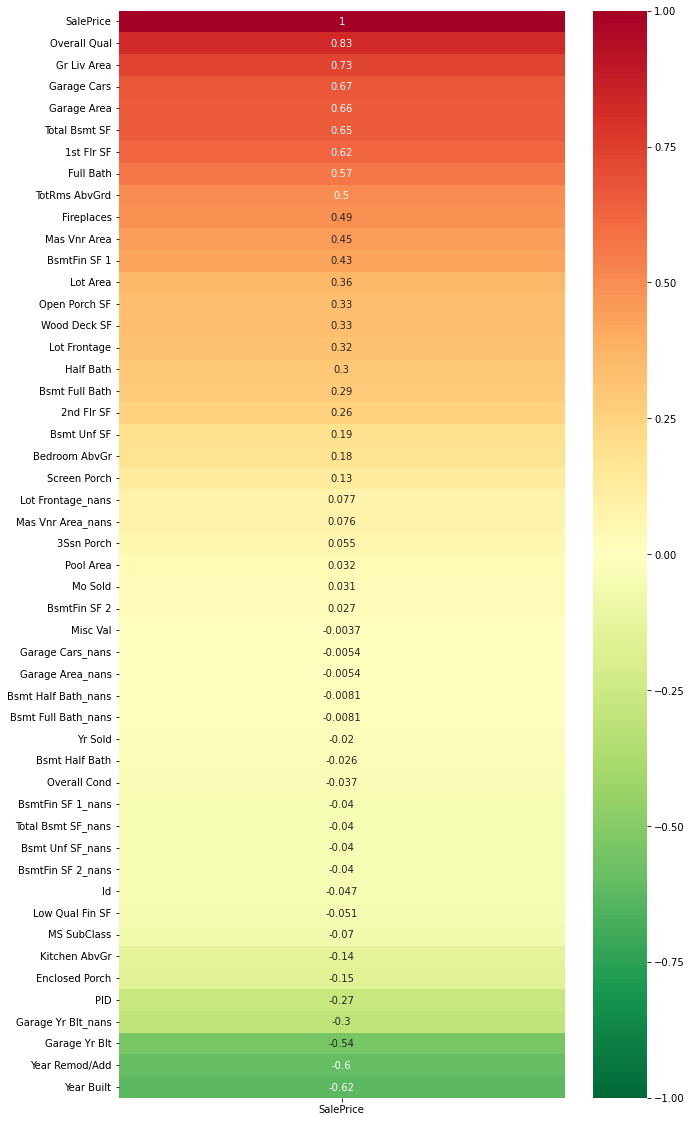

In [17]:
plt.figure(figsize = (10,20))
df.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False)
sns.heatmap(df.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False), vmin =-1, vmax=1, annot = True, cmap = 'RdYlGn_r');

In [18]:
df.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False).index

Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars',
       'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath',
       'TotRms AbvGrd', 'Fireplaces', 'Mas Vnr Area', 'BsmtFin SF 1',
       'Lot Area', 'Open Porch SF', 'Wood Deck SF', 'Lot Frontage',
       'Half Bath', 'Bsmt Full Bath', '2nd Flr SF', 'Bsmt Unf SF',
       'Bedroom AbvGr', 'Screen Porch', 'Lot Frontage_nans',
       'Mas Vnr Area_nans', '3Ssn Porch', 'Pool Area', 'Mo Sold',
       'BsmtFin SF 2', 'Misc Val', 'Garage Cars_nans', 'Garage Area_nans',
       'Bsmt Half Bath_nans', 'Bsmt Full Bath_nans', 'Yr Sold',
       'Bsmt Half Bath', 'Overall Cond', 'BsmtFin SF 1_nans',
       'Total Bsmt SF_nans', 'Bsmt Unf SF_nans', 'BsmtFin SF 2_nans', 'Id',
       'Low Qual Fin SF', 'MS SubClass', 'Kitchen AbvGr', 'Enclosed Porch',
       'PID', 'Garage Yr Blt_nans', 'Garage Yr Blt', 'Year Remod/Add',
       'Year Built'],
      dtype='object')

# Start Test Cleaning

In [19]:
test_df = pd.read_csv('../data/test.csv')
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [20]:
categorical_nans_test = [feature for feature in test_df.columns if test_df[feature].dtypes == 'O' and test_df[feature].isnull().sum() > 0]
categorical_test = [feature for feature in test_df.columns if test_df[feature].dtypes == 'O']
def replace_categorical_nans(df, categorical_nans):
    local_df = df.copy()
    local_df[categorical_nans]= local_df[categorical_nans].fillna('Missing')
    return local_df

test_df = replace_categorical_nans(test_df, categorical_nans_test)
test_df[categorical_nans_test].isnull().sum()

Alley             0
Mas Vnr Type      0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Electrical        0
Fireplace Qu      0
Garage Type       0
Garage Finish     0
Garage Qual       0
Garage Cond       0
Pool QC           0
Fence             0
Misc Feature      0
dtype: int64

In [21]:
numerical_nans_test = [feature for feature in test_df.columns if test_df[feature].dtypes != 'O' and test_df[feature].isnull().sum() > 0]

numerical_test = [feature for feature in test_df.columns if test_df[feature].dtypes != 'O']

test_df[numerical_nans_test].isnull().sum()

Lot Frontage     160
Mas Vnr Area       1
Garage Yr Blt     45
dtype: int64

In [22]:
#Replace numerical columns with ones with their nulls filled and create new column for each remembering where the nulls were

for feature in numerical_nans_test:

    median_val = test_df[feature].median()
    test_df[feature + '_nans'] = np.where(test_df[feature].isnull(), 1,0)
    test_df[feature].fillna(median_val, inplace = True)
    
test_df[numerical_nans_test].isnull().sum()

Lot Frontage     0
Mas Vnr Area     0
Garage Yr Blt    0
dtype: int64

In [23]:
year_features_test = [feature for feature in test_df.columns if 'Yr' in feature or 'Year' in feature]
year_features_test

['Year Built',
 'Year Remod/Add',
 'Garage Yr Blt',
 'Yr Sold',
 'Garage Yr Blt_nans']

In [24]:
for feature in ['Year Built','Year Remod/Add','Garage Yr Blt']:
    test_df[feature] = (test_df['Yr Sold']- test_df[feature])

In [25]:
continuous_features_test = [feature for feature in numerical_test if len(test_df[feature].unique())>25 and feature not in year_features_test+['Id','PID']]

print(len(continuous_features_test))

columns_log_transformed_test = []
for feature in continuous_features_test:
        if 0 in test_df[feature].unique(): #Whenever doing log transformations this is necessary becuase Log of zero is undefined
            pass
        else:
            test_df[feature]=np.log(test_df[feature])
            columns_log_transformed_test.append(feature)

15


In [26]:
columns_log_transformed_test

['Lot Frontage', 'Lot Area', '1st Flr SF', 'Gr Liv Area']

In [27]:
for feature in categorical_test:
    occurence_rate = test_df.groupby(feature)['Id'].count()/len(test_df) #creates series of percent occurences of each label
    not_rare = occurence_rate[occurence_rate>0.01].index #takes out sub 1 percent occurence labels from series
    test_df[feature]=np.where(test_df[feature].isin(not_rare),test_df[feature],'Rare_var') #applies to df, keeps 99% labels as is, marks 1%ers as rare


In [28]:
test_df.isnull().sum().sum()

0

In [29]:
test_df.to_csv('../data/test_cleaned1.csv', index = False)

# END Test Cleaning

## Now onto feature selection!